# Media

There's a EDA on:
1. Pictures
2. Secure Thumbnail
3. Video ID

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

X_dataframe = pd.read_csv("../data/X_dataframe.csv")

# Pictures

In [3]:
X_dataframe["pictures"].iloc[90]

"[{'size': '500x434', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg', 'max_size': '1200x1043', 'url': 'http://mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg', 'quality': '', 'id': '828501-MLA3850907475_082015'}, {'size': '500x445', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg', 'max_size': '1200x1069', 'url': 'http://mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg', 'quality': '', 'id': '759501-MLA3850907475_082015'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg', 'quality': '', 'id': '18925-MLA3850907475_092014'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/18991-MLA3850907475_092014-O.jpg', 'max_size': '720x540', 'url': 'http://mla-s2-p.mlstatic.com/18991-MLA38509

In [5]:
import ast

X_dataframe["pictures"] = X_dataframe["pictures"].apply(ast.literal_eval)
X_dataframe["pictures"].iloc[90]

[{'size': '500x434',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg',
  'max_size': '1200x1043',
  'url': 'http://mla-s1-p.mlstatic.com/828501-MLA3850907475_082015-O.jpg',
  'quality': '',
  'id': '828501-MLA3850907475_082015'},
 {'size': '500x445',
  'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg',
  'max_size': '1200x1069',
  'url': 'http://mla-s2-p.mlstatic.com/759501-MLA3850907475_082015-O.jpg',
  'quality': '',
  'id': '759501-MLA3850907475_082015'},
 {'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg',
  'max_size': '1200x900',
  'url': 'http://mla-s1-p.mlstatic.com/18925-MLA3850907475_092014-O.jpg',
  'quality': '',
  'id': '18925-MLA3850907475_092014'},
 {'size': '500x375',
  'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/18991-MLA3850907475_092014-O.jpg',
  'max_size': '720x540',
  'url': 'http:

## URL

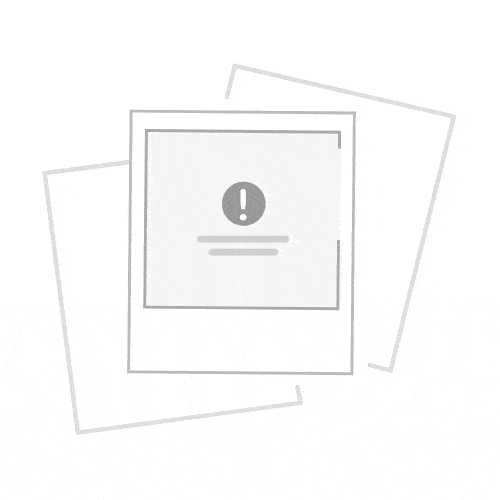

In [6]:
import requests
from PIL import Image
import io

# Get the first picture
picture_url = X_dataframe["pictures"].iloc[29][1]["url"]
response = requests.get(picture_url)
image = Image.open(io.BytesIO(response.content))
image


#### 💡 Insights
The images can't be accessed and the quality is always empty

## Quality

In [7]:
X_dataframe["pictures"].apply(lambda x: list(set([m["quality"] for m in x]))).value_counts()

pictures
[]    89297
[]      703
Name: count, dtype: int64

## Max size

In [8]:
max_sizes = list(X_dataframe["pictures"].apply(
    lambda x: list(set([m["max_size"] for m in x]))
).value_counts().index)

In [9]:
max_sizes = list(set(sum(max_sizes, [])))
max_sizes

['',
 '502x278',
 '500x928',
 '231x216',
 '287x175',
 '169x169',
 '430x315',
 '353x499',
 '312x92',
 '380x480',
 '421x371',
 '456x457',
 '1200x837',
 '138x226',
 '1041x1200',
 '188x130',
 '900x247',
 '250x332',
 '540x432',
 '1136x1188',
 '300x180',
 '637x657',
 '832x1152',
 '1110x920',
 '740x631',
 '275x385',
 '440x412',
 '248x415',
 '398x126',
 '231x244',
 '257x286',
 '376x700',
 '640x290',
 '79x90',
 '500x458',
 '180x178',
 '773x672',
 '406x386',
 '500x192',
 '140x218',
 '1200x993',
 '480x401',
 '268x270',
 '93x150',
 '490x313',
 '931x458',
 '913x328',
 '865x458',
 '343x780',
 '742x627',
 '550x490',
 '644x386',
 '524x479',
 '254x750',
 '348x500',
 '216x305',
 '425x584',
 '417x792',
 '400x380',
 '967x728',
 '907x523',
 '148x141',
 '796x768',
 '701x1200',
 '640x930',
 '731x611',
 '332x68',
 '884x1024',
 '800x462',
 '317x500',
 '717x443',
 '573x1200',
 '250x275',
 '460x296',
 '448x369',
 '231x217',
 '895x900',
 '768x908',
 '185x273',
 '800x281',
 '500x207',
 '697x478',
 '1024x497',
 '31

In [11]:
def calculate_total_max_size(x: str):
    max_sizes = list(set([m["max_size"] for m in x]))
    max_size = 0
    for size in max_sizes:
        try:
            height = int(size.split("x")[0])
            width = int(size.split("x")[1])
            if height * width > max_size:
                max_size = height * width
        except:
            pass
    return max_size

In [12]:
X_dataframe["total_max_size"] = X_dataframe["pictures"].apply(calculate_total_max_size)
X_dataframe["total_max_size"].value_counts()

total_max_size
1080000    24760
810000      3588
307200      3475
1440000     1610
250000      1437
           ...  
816059         1
646200         1
581120         1
380700         1
10584          1
Name: count, Length: 13001, dtype: int64

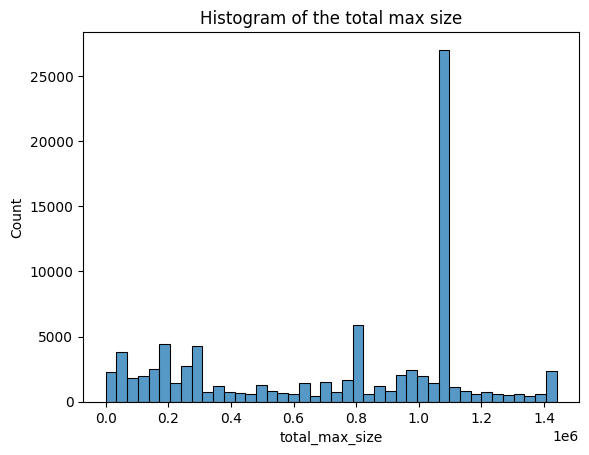

In [13]:
sns.histplot(X_dataframe["total_max_size"])
plt.title("Histogram of the total max size")
plt.show()


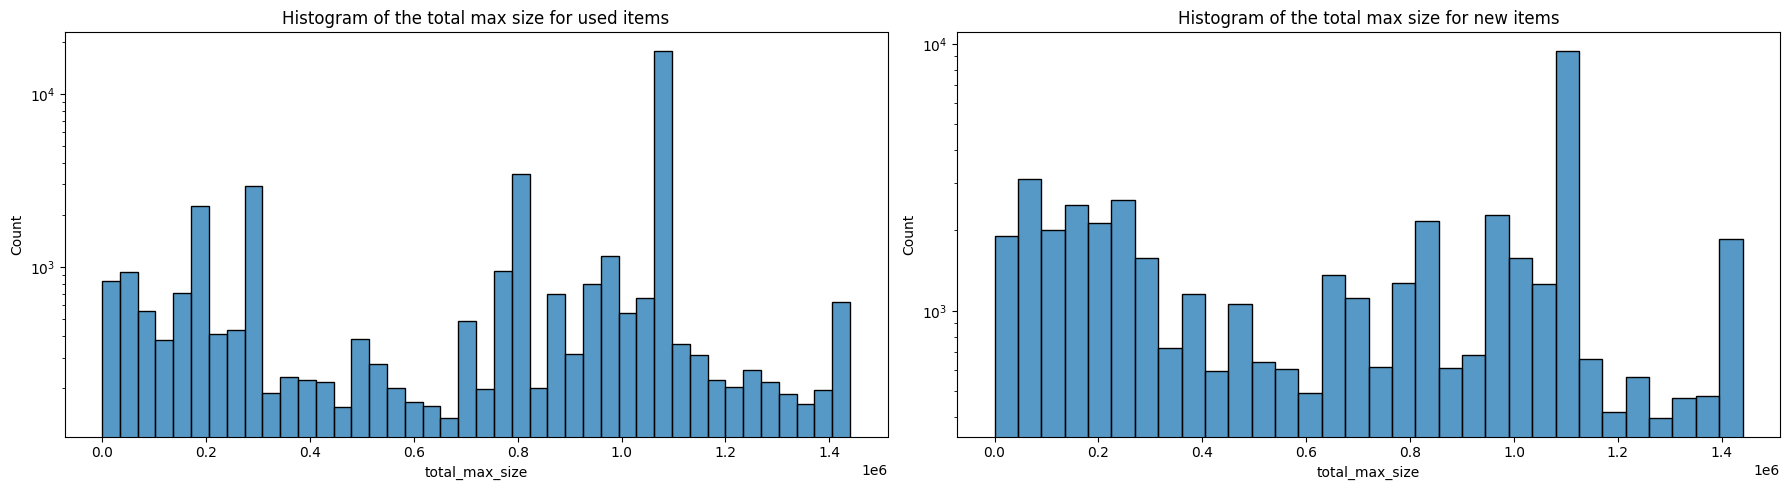

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["total_max_size"], ax=ax[0])
ax[0].set_title("Histogram of the total max size for used items")
ax[0].set_yscale("log")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["total_max_size"], ax=ax[1])
ax[1].set_title("Histogram of the total max size for new items")
ax[1].set_yscale("log")
plt.tight_layout()

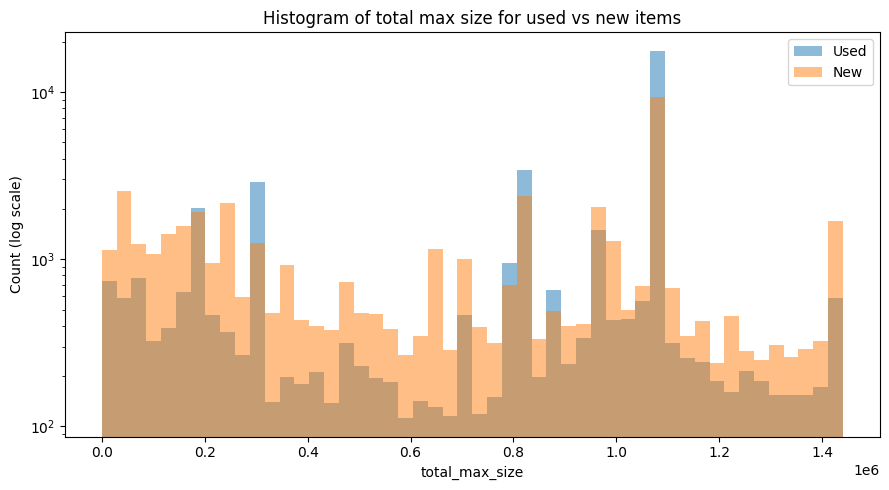

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "total_max_size"],
    bins=50,
    alpha=0.5,
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "total_max_size"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of total max size for used vs new items")
ax.set_xlabel("total_max_size")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

#### 💡 Insights  
The `total_max_size` distributions differ between new and used items.  
- **Used items** show a higher concentration at lower image sizes and more irregular spikes across the range.  
- **New items** are more evenly distributed, with stronger representation at higher image sizes.  

This suggests that `total_max_size` could provide meaningful signal for distinguishing between new and used listings, possibly reflecting differences in image quality or seller behavior.

In [15]:
pearson_corr = X_dataframe[["used", "total_max_size"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "total_max_size"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "total_max_size"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                      used  total_max_size
used            1.000000        0.163425
total_max_size  0.163425        1.000000
Spearman correlation:                      used  total_max_size
used            1.000000        0.165147
total_max_size  0.165147        1.000000
Kendall correlation:                     used  total_max_size
used            1.00000         0.13918
total_max_size  0.13918         1.00000


The linear correlation is not strong, but it's better than other features.

## Size

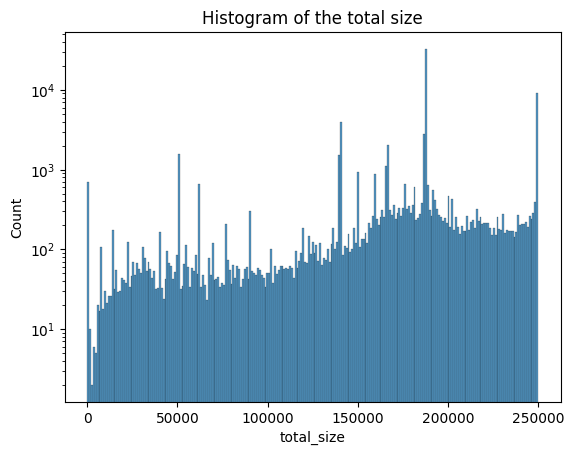

In [17]:
def calculate_total_size(x: str):
    sizes = list(set([m["size"] for m in x]))
    max_size = 0
    for size in sizes:
        try:
            height = int(size.split("x")[0])
            width = int(size.split("x")[1])
            if height * width > max_size:
                max_size = height * width
        except:
            pass
    return max_size


X_dataframe["total_size"] = X_dataframe["pictures"].apply(calculate_total_size)
sns.histplot(X_dataframe["total_size"])
plt.title("Histogram of the total size")
plt.yscale("log")
plt.show()



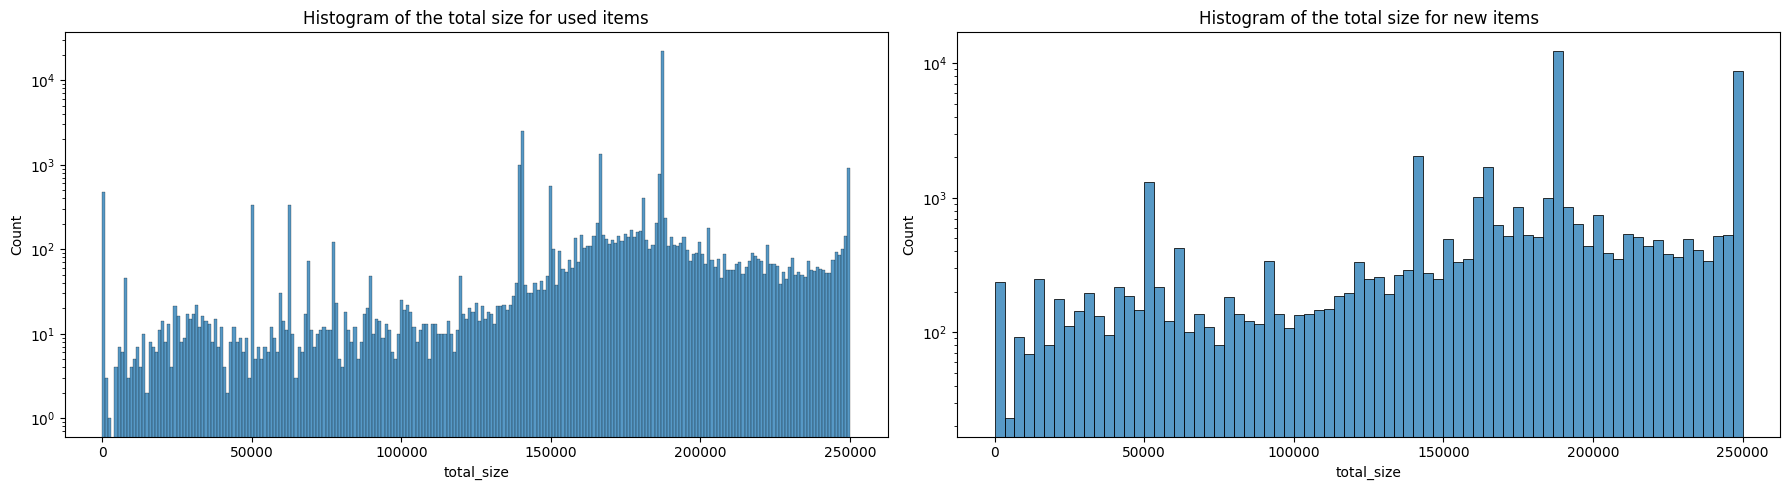

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["total_size"], ax=ax[0])
ax[0].set_title("Histogram of the total size for used items")
ax[0].set_yscale("log")
sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["total_size"], ax=ax[1])
ax[1].set_title("Histogram of the total size for new items")
ax[1].set_yscale("log")
plt.tight_layout()
plt.show()

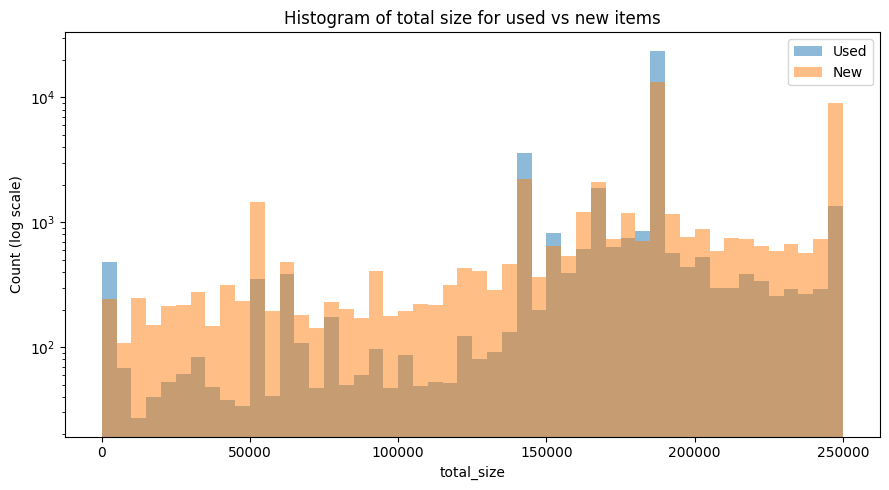

In [22]:
fig, ax = plt.subplots(figsize=(9, 5))

# Used items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "total_size"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "total_size"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of total size for used vs new items")
ax.set_xlabel("total_size")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

#### 💡 Insights  
The distributions of `total_size` are very similar for used and new items.  
This suggests that `total_size` may provide **limited discriminative power** for predicting item condition compared to other image-related features.

In [28]:
pearson_corr = X_dataframe[["used", "total_size"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "total_size"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "total_size"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                  used  total_size
used        1.000000   -0.025311
total_size -0.025311    1.000000
Spearman correlation:                  used  total_size
used        1.000000   -0.086446
total_size -0.086446    1.000000
Kendall correlation:                 used  total_size
used        1.00000    -0.07439
total_size -0.07439     1.00000


#### 💡 Insights  
The correlation of `total_size` with item condition is even weaker than that of `total_max_size`.  
Therefore, only `total_max_size` will be retained as a feature.

## Thumbnail

In [29]:
X_dataframe["thumbnail"].describe()

count                                                 89297
unique                                                89259
top       http://www.mercadolibre.com/jm/img?s=STC&v=I&f...
freq                                                     35
Name: thumbnail, dtype: object

In [30]:
X_dataframe["thumbnail"].iloc[0]

'http://mla-s1-p.mlstatic.com/5386-MLA4695330653_052013-I.jpg'

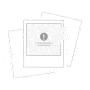

In [31]:
response = requests.get(X_dataframe["thumbnail"].iloc[90])
image = Image.open(io.BytesIO(response.content))
image

#### 💡 Insights  
Not usable since it's not accesible

# Secure Thumbnail

In [32]:
X_dataframe["secure_thumbnail"].describe()

count                                                 89297
unique                                                89259
top       https://www.mercadolibre.com/jm/img?s=STC&v=I&...
freq                                                     35
Name: secure_thumbnail, dtype: object

In [33]:
X_dataframe["secure_thumbnail"].value_counts()

secure_thumbnail
https://www.mercadolibre.com/jm/img?s=STC&v=I&f=proccesing_image_es.jpg              35
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/6279-MLApp_27_21489919_1-I.jpg        4
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/6270-MLApp_27_19602074_1-I.jpg        2
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/382301-MLA2247258982_052015-I.jpg     1
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/511801-MLA5521774469_092015-I.jpg     1
                                                                                     ..
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/6091-MLA3556211925_062013-I.jpg       1
https://a248.e.akamai.net/mla-s1-p.mlstatic.com/735901-MLA2058662691_092015-I.jpg     1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/13384-MLA4708780549_042014-I.jpg      1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/13656-MLA1151691589_102012-I.jpg      1
https://a248.e.akamai.net/mla-s2-p.mlstatic.com/716501-MLA8241142190_082015-I.jpg     1
Name: count, Le

#### 💡 Insights  
This variable does not provide much information.  
Its predictive value is likely limited.

# Video ID

In [34]:
X_dataframe["video_id"].isnull().sum()/90000

np.float64(0.9702666666666667)

In [35]:
X_dataframe["video_id"].value_counts()

video_id
QQNfOicE_o8    278
EVCQuwl7RIE     82
mYNRC5Ia1sk     35
6JhmxwtTjoA     25
U7okRYLuBNo     25
              ... 
P73B4EWa4z8      1
PlP95w5YauM      1
5HxR7Pj9U-g      1
Y-4S84iqeOw      1
Ehbqh9NsX-Q      1
Name: count, Length: 1886, dtype: int64

#### 💡 Insights  
This `video_id` contains too many null values and provides little useful information.  
It is unlikely to contribute meaningfully to the model.

In [37]:
X_dataframe["has_video"] = X_dataframe["video_id"].notna()
X_dataframe.groupby("has_video")["used"].value_counts()

has_video  used 
False      False    46287
           True     41037
True       False     2065
           True       611
Name: count, dtype: int64

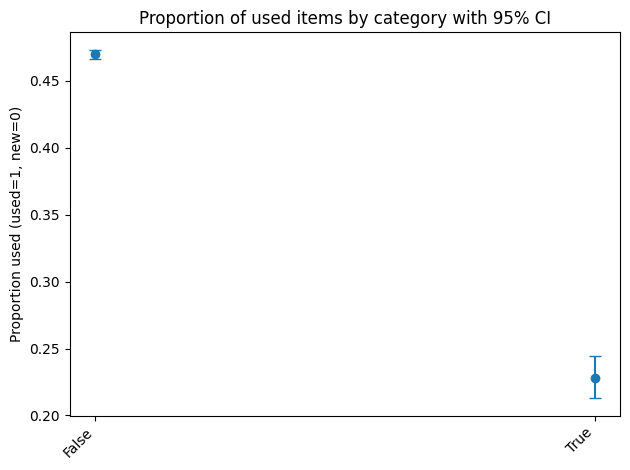

In [38]:
res = column_analysis("has_video", X_dataframe)
plot_column_analysis(res)

#### 💡 Insights  
The `has_video` variable contains many `False` and does not show a strong signal.  
The observed proportion is neither extreme nor well supported by sufficient data, limiting its predictive value.